# L2 Data Visualization Notebook

This report comprises the entire Data Visualization of the L2 data (Level 2 Data)  of the Hotel Recommendation system built. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Parquet file into a DataFrame
file_path = '../output/l2_data_2024-08-01_15-28-04.parquet'
df = pd.read_parquet(file_path)

df_head = df.head()

df_head.style.hide()

region,hotel_name,avg_rating,user_ratings_total,review_rating,review_date_in_days,review_language,review_length,review_text_features,latitude,longitude,distance_to_ski_resort,distance_to_city_center
Ordino,Apartaments del Meligar,4.800000,175,5.000000,0,es,92,"{'type': 0, 'size': 20, 'indices': array([ 0, 4, 7, 12, 17, 18], dtype=int32), 'values': array([0.34615517, 1.10242668, 0.57877637, 0.75713948, 0.42675719, 0.55726153])}",42.532680,1.576841,5.754313,5.340645
Ordino,Annapurna Aparthotel,4.200000,600,5.000000,1825,es,414,"{'type': 0, 'size': 20, 'indices': array([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32), 'values': array([0.69231034, 2.73492089, 0.60266318, 1.20014529, 1.10242668, 4.00974491, 2.27632178, 2.89388185, 2.52940914, 0.78274778, 1.35257876, 1.13570922, 2.24413662, 1.63119314, 0.49237896, 1.22680055, 0.85351438, 1.67178458, 4.3590041 ])}",42.590209,1.524379,3.425662,9.167398
Ordino,Hotel Milà,4.400000,479,4.000000,2190,en,82,"{'type': 0, 'size': 20, 'indices': array([ 1, 2, 3, 4, 9, 10, 12, 13, 18], dtype=int32), 'values': array([0.54698418, 0.60266318, 0.30003632, 0.36747556, 0.39137389, 0.67628938, 0.75713948, 0.74804554, 0.55726153])}",42.533531,1.610510,8.285059,7.866307
La Massana,Hotel Montané,4.200000,324,5.000000,1460,en,137,"{'type': 0, 'size': 20, 'indices': array([ 1, 2, 3, 4, 5, 11, 12, 13, 15, 18], dtype=int32), 'values': array([1.09396835, 0.60266318, 0.30003632, 0.73495112, 0.5728207 , 1.33830362, 0.75713948, 0.37402277, 0.49237896, 0.55726153])}",42.572868,1.483891,3.111637,7.851201
Sant Julià de Lòria,HOTEL SANT ELOI,3.200000,1348,3.000000,1460,en,161,"{'type': 0, 'size': 20, 'indices': array([ 0, 3, 4, 8, 9, 11, 14, 16, 19], dtype=int32), 'values': array([0.69231034, 0.30003632, 0.36747556, 0.36134416, 0.78274778, 0.66915181, 0.54373105, 1.22680055, 0.72650068])}",42.452963,1.491823,1.157777,6.553227


## 1. Review Length Distribution

Plot the length of each review and its frequency

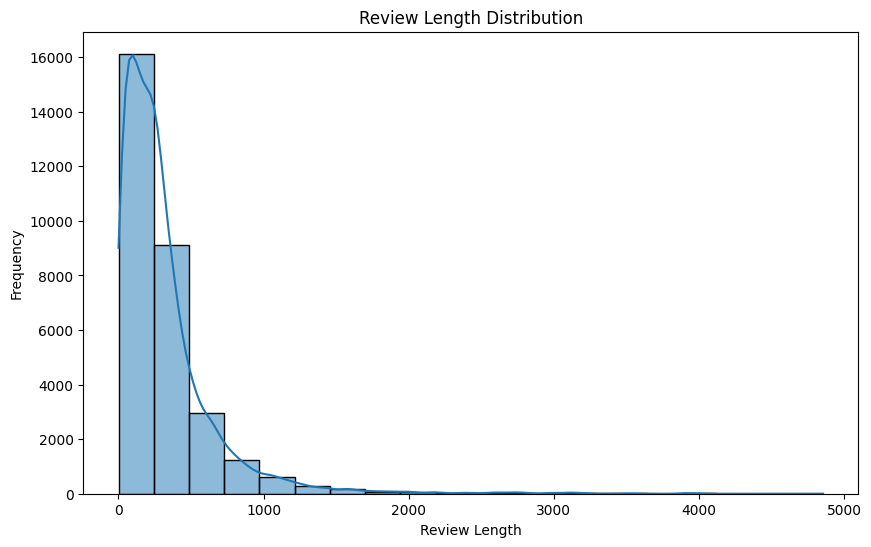

In [4]:
# Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## 2. Distance to Ski resorts

Plot the minimum distance to a ski resort and its frequency. 

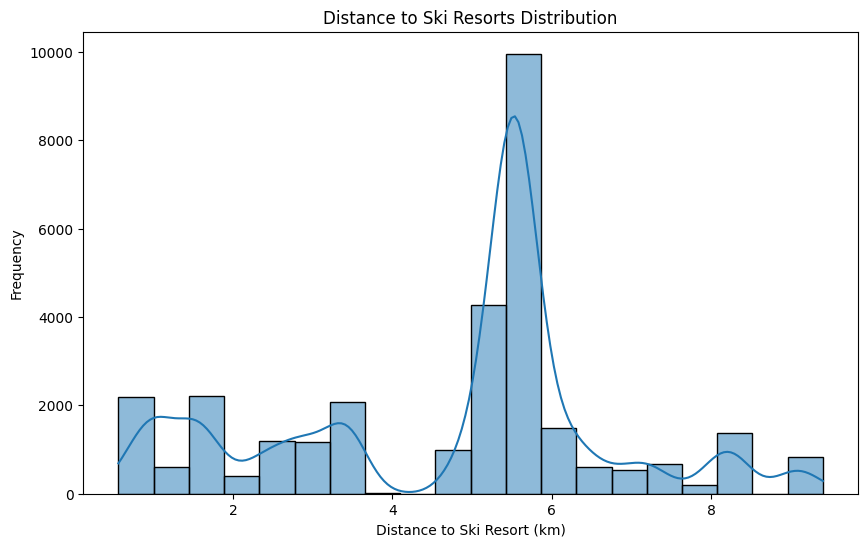

In [5]:
# Distance to Ski Resorts
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_ski_resort'], bins=20, kde=True)
plt.title('Distance to Ski Resorts Distribution')
plt.xlabel('Distance to Ski Resort (km)')
plt.ylabel('Frequency')
plt.show()

## 3. Distance to city center

Plot the minimum distance to the city center per hotel, and its frequency. 

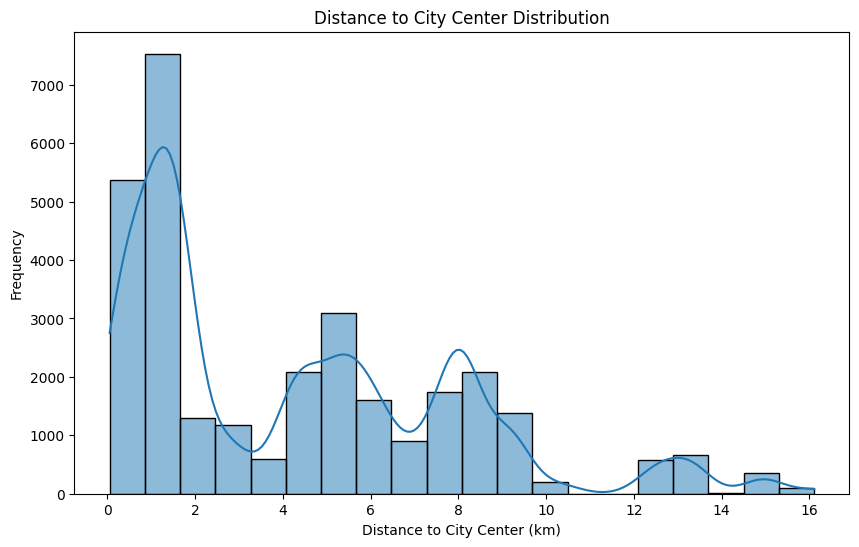

In [6]:
# Distance to City Center
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_city_center'], bins=20, kde=True)
plt.title('Distance to City Center Distribution')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Frequency')
plt.show()

## 4. Ratings vs Distance to Ski resort

Plot the average rating of a hotel based on the distance to a ski resort

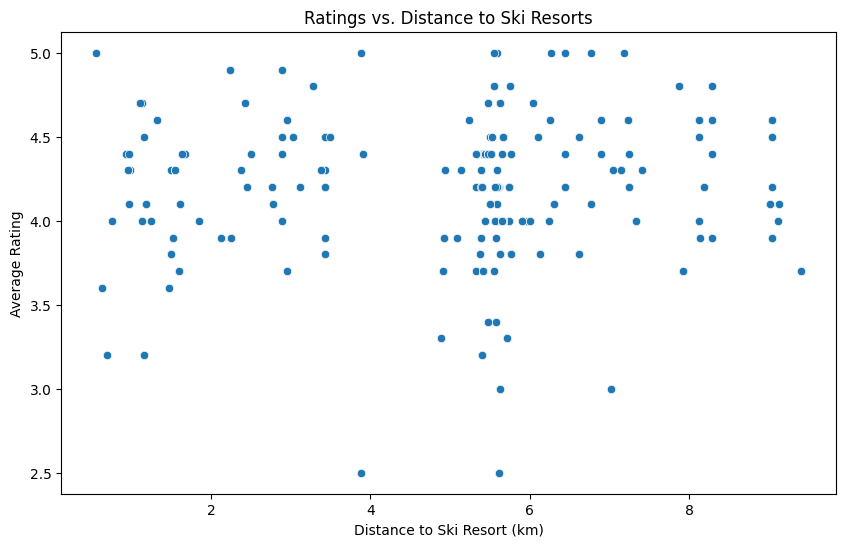

In [7]:
# Ratings vs. Distance to Ski Resorts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_ski_resort', y='avg_rating')
plt.title('Ratings vs. Distance to Ski Resorts')
plt.xlabel('Distance to Ski Resort (km)')
plt.ylabel('Average Rating')
plt.show()

## 5. Ratings vs Distance to city center

Plot the average rating of a hotel based on the distance to the city center

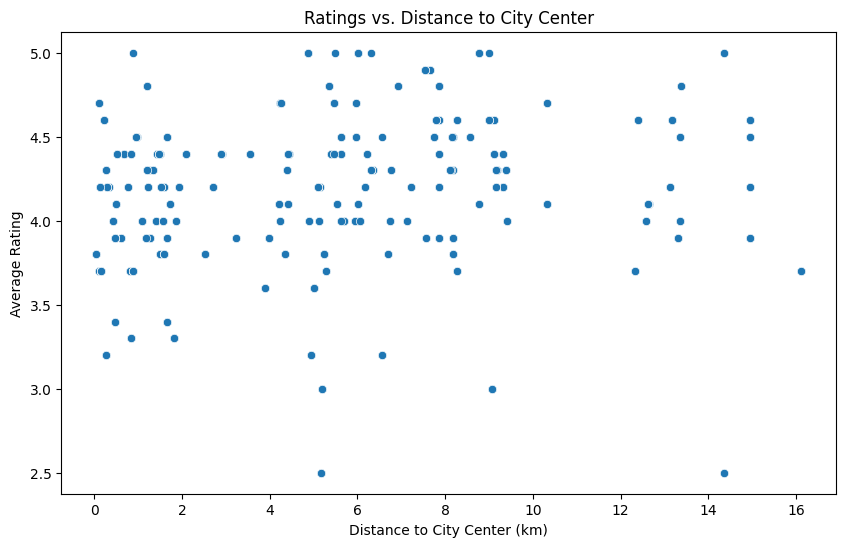

In [8]:
# Ratings vs. Distance to City Center
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_city_center', y='avg_rating')
plt.title('Ratings vs. Distance to City Center')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Average Rating')
plt.show()

## 6. Review Text Features

The plot that visualizes the distribution of values for each feature extracted from the `review_text_features` column in the dataset. 
Each subplot represents the distribution of one of the features across all reviews, showing how frequently each value occurs.

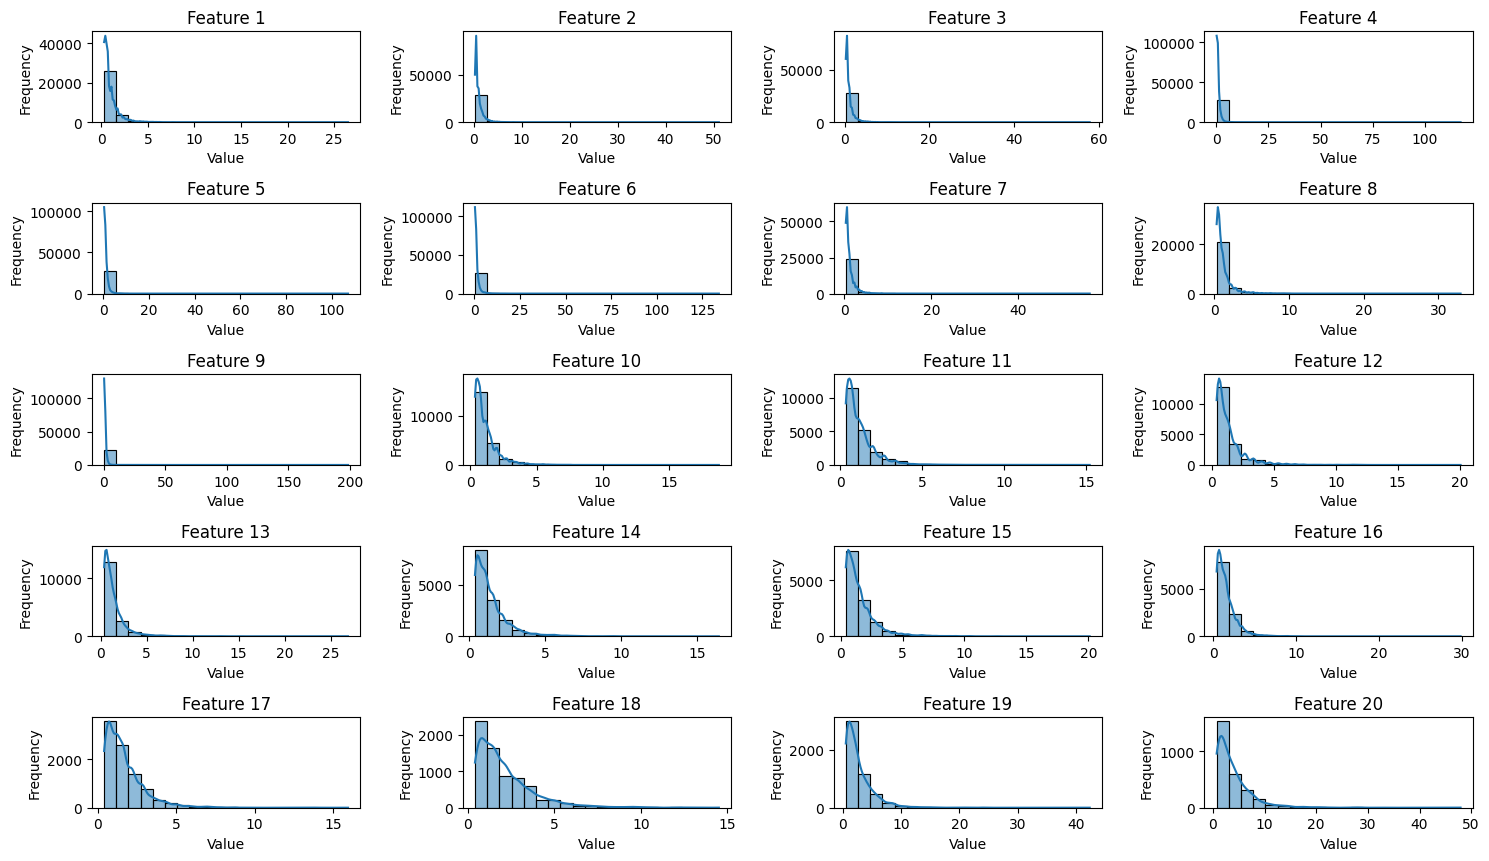

In [22]:
# Extract the review text features
def extract_review_text_features(row):
    try:
        features = row['review_text_features']
        return features['values']
    except (TypeError, KeyError):
        return []

df['review_text_values'] = df.apply(extract_review_text_features, axis=1)

# Create a DataFrame for review text features
review_text_df = pd.DataFrame(df['review_text_values'].tolist())

# Plot the distribution of each feature
if not review_text_df.empty:
    num_features = review_text_df.shape[1]
    num_cols = 4
    num_rows = (num_features // num_cols) + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, column in enumerate(review_text_df.columns):
        sns.histplot(review_text_df[column], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Feature {i+1}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No data available in review_text_df")